# Modeling and Simulation in Python

Starter code for the orbit example

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Earth falling into the sun

Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Here's a solution.

In [2]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [17]:
# And an inition condition (with everything in SI units)

r_0 = Vector(147e9, 0) * m
v_init = Vector(0, -0.1) * m / s

init = State(x = r_0.x,
             y = r_0.y,
             vx = v_init.x,
             vy = v_init.y)

,values
x,147000000000.0 meter
y,0.0 meter
vx,0.0 meter / second
vy,-0.1 meter / second


In [18]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=1e7 * s)

,values
init,x 147000000000.0 meter y 0....
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,10000000.0 second


In [19]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r_0(x,y)
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    
    force = G * m1 * m2 / sqrt(x**2 + y**2)
    direction = -r_0.hat()
    force_g = direction * force
    
    return force_g

In [20]:
universal_gravitation(init, system)

<Quantity([-5.39291344e+33 -0.00000000e+00], 'meter * newton')>

In [21]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)    
    
    r = Vector(x, y)
    v = Vector(vx, vy)
    
    force = universal_gravitation(state, system)
    dydt = v
    dvdt = -force / m2
    
    #unpacking vectors bc ode solvers cannot handle vectors
    return dydt.x, dydt.y, dvdt.x, dvdt.y

In [22]:
# Always test the slope function!

slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(-0.1, 'meter / second')>,
 <Quantity(903033061.2244896, 'meter * newton / kilogram')>,
 <Quantity(0.0, 'meter * newton / kilogram')>)

In [ ]:
# Here's an event function that stops the simulation
# before the collision

def event_func(state, t, system):
    r, v = state
    return r - system.r_final

In [ ]:
# Always test the event function!

event_func(init, 0, system)

In [23]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func)
#temporarily commented out
#results, details = run_ode_solver(system, slope_func, events=event_func)
details

,values
sol,None
t_events,[]
nfev,188
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [24]:
# Here's how long it takes...

t_final = get_last_label(results) * s

<Quantity(10000000.0, 'second')>

In [25]:
# ... expressed in units we understand

t_final.to(UNITS.day)

<Quantity(115.74074074074072, 'day')>

In [26]:
# Before plotting, we run the simulation again with `t_eval`

ts = linspace(t_0, t_final, 201)
#temporarily commented out
#results, details = run_ode_solver(system, slope_func, events=event_func, t_eval=ts)
results, details = run_ode_solver(system, slope_func, t_eval=ts)

In [27]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [28]:
# Scaling the distance to million km

x = results.x / 1e9;
y = results.y / 1e9;

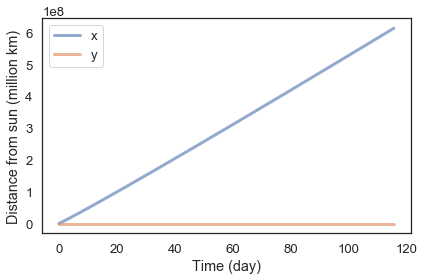

In [32]:
# And plotting

plot(x, label='x')
plot(y, label='y')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')

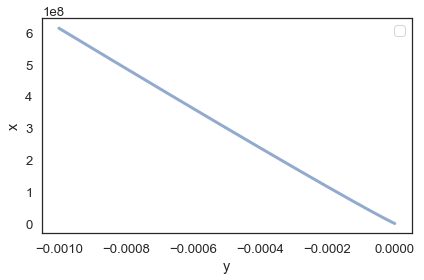

In [38]:
plot(y,x)

decorate(xlabel='y',
         ylabel='x')